# Task 3 : Unsupervised Machine Learning

## Problem Statement : 
<p style="font-size:120%;">From The Given "iris" Dataset, Predict The Optimum Number Of Clusters And Represent it Visually</p>

In [93]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

## Reading and Basic processing on Iris data

In [94]:
#Reading the iris data 
iris_data = pd.read_csv("iris.csv",index_col='Id')

In [95]:
iris_data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [96]:
#Checking shape of data
iris_data.shape

(150, 5)

In [97]:
#Checking unique Species in data
pd.unique(iris_data['Species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [98]:
#Checking for null values
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [99]:
#Mapping species to numeric values
dict_species ={"Iris-setosa":0, 
               "Iris-versicolor":1, 
               "Iris-virginica":2
              }

In [100]:
iris_data["Species_coded"]=iris_data["Species"].map(dict_species)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_coded
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0
2,4.9,3.0,1.4,0.2,Iris-setosa,0
3,4.7,3.2,1.3,0.2,Iris-setosa,0
4,4.6,3.1,1.5,0.2,Iris-setosa,0
5,5.0,3.6,1.4,0.2,Iris-setosa,0


## Elbow Method - To find optimal number of clusters for K-means
 
<p style="font-size:120%;">For more details refer
<br>
https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/</p>

In [101]:
#Separating remaining data from type of Species 
X=iris_data.iloc[:,:-2]
Y=iris_data.iloc[:,-1]

In [102]:
#Inertia - It is the sum of squared distances of samples to their closest cluster center.
#Calculate Inertia to find optimum number of clusters 
Inertias = []

for clusters in range(1,15):
    kmeans=KMeans(n_clusters=clusters,init='k-means++')
    kmeans.fit(X)
    Inertias.append(kmeans.inertia_)
    

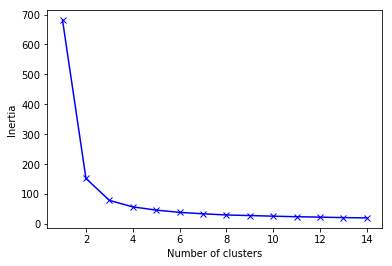

In [103]:
#Plotting Inertia vs Number of clusters
# Optimum value of clusters is 3 because we got an elbow like graph which joint at 3
plt.plot(range(1,15),Inertias,'bx-')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

## Defining the Model and Clustering the Iris data

In [104]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [105]:
Y.head()

Id
1    0
2    0
3    0
4    0
5    0
Name: Species_coded, dtype: int64

In [106]:
# Kmeans Clusterring model
kmeans=KMeans(n_clusters=3,init='k-means++')


In [107]:
# Train model on data 
Y_clusters=kmeans.fit(X)

In [108]:
#Importing libraries for performance testing of model
from sklearn.metrics import accuracy_score,confusion_matrix

In [109]:
accuracy_score(Y,kmeans.labels_)

0.8933333333333333

In [110]:
pd.crosstab(Y,kmeans.labels_)

col_0,0,1,2
Species_coded,,,
0,50,0,0
1,0,48,2
2,0,14,36


## Visualizing the Clusters

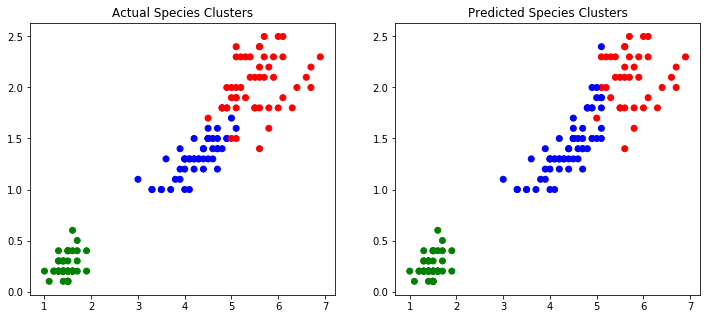

In [111]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12,5)
color=np.array(['green','blue','red'])
ax1.scatter(x=iris_data["PetalLengthCm"],y=iris_data["PetalWidthCm"],c=color[Y])
ax2.scatter(x=iris_data["PetalLengthCm"],y=iris_data["PetalWidthCm"],c=color[kmeans.labels_])
ax1.title.set_text('Actual Species Clusters')
ax2.title.set_text('Predicted Species Clusters')
plt.show()